Class Work


(Assignment Work at bottom)


In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = pd.read_csv(
    r'C:\Users\deshi\Code\cemetery-of-culture\year-3\neural-networks\2-eda-and-tensors\Data Science Job Salaries\ds_salaries.csv')
# data.head()
# https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries


In [5]:
data


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [3]:
data.isnull().sum()


Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [4]:
data.drop('Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week', inplace=True, axis=1)
data.drop('Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR', inplace=True, axis=1)
data.drop('Annual bonus+stocks one year ago. Only answer if staying in same country',
          inplace=True, axis=1)
data.drop('Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country', inplace=True, axis=1)
data.drop('Yearly bonus + stocks in EUR', inplace=True, axis=1)


KeyError: "['Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week'] not found in axis"

In [6]:
data.isnull().sum()


Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
test = data[data['Other technologies/programming languages you use often'].isnull()]


KeyError: 'Other technologies/programming languages you use often'

In [ ]:
test = test[test['Your main technology / programming language'].isnull()]
len(test)


70

In [ ]:
rem_mul_nan = data['Other technologies/programming languages you use often'].isin(
    test['Other technologies/programming languages you use often'])
data.drop(data[rem_mul_nan].index, inplace=True)
data.isnull().sum()


Timestamp                                                   0
Age                                                        19
Gender                                                      4
City                                                        0
Position                                                    2
Total years of experience                                   8
Years of experience in Germany                             23
Seniority level                                             7
Your main technology / programming language                57
Other technologies/programming languages you use often      0
Yearly brutto salary (without bonus and stocks) in EUR      0
Number of vacation days                                    47
Employment status                                           9
Сontract duration                                          16
Main language at work                                       7
Company size                                                8
Company 

In [8]:
data.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [9]:
num_data = data[['Age', 'Total years of experience', 'Years of experience in Germany',
                 'Yearly brutto salary (without bonus and stocks) in EUR', 'Number of vacation days']]


KeyError: "None of [Index(['Age', 'Total years of experience', 'Years of experience in Germany',\n       'Yearly brutto salary (without bonus and stocks) in EUR',\n       'Number of vacation days'],\n      dtype='object')] are in the [columns]"

In [ ]:
def change_to_int(idx):
    try:
        return float(idx)
    except ValueError:
        return np.nan


In [ ]:
num_data.head()


,Age,Total years of experience,Years of experience in Germany,Yearly brutto salary (without bonus and stocks) in EUR,Number of vacation days
0,26.0,5,3,80000.0,30
2,29.0,12,6,120000.0,30
4,37.0,17,6,62000.0,29
5,32.0,5,1,76000.0,30
7,24.0,5,1,65000.0,27


In [ ]:
# num_data=num_data.fillna(num_data.median())
# num_data.isnull().sum()
num_data['Total years of experience'].unique()


array(['5', '12', '17', '8', '2', '25', '14', '7', '18', '11', '15', '30',
       '6', '13', '10', '3', '40', '26', '23', '9', '4', '19', '20',
       '5.5', '22', '16', '0.8', '1', nan, '1.5', '21', '7.5', '2.5',
       '28', '29', '1,5', '24', '0', '4.5', '27',
       '1 (as QA Engineer) / 11 in total', '2,5', '15, thereof 8 as CTO',
       '31', '6 (not as a data scientist, but as a lab scientist)', '3.5',
       'less than year'], dtype=object)

In [ ]:
large_strs = num_data[num_data['Total years of experience'].str.len() > 10]
# num_data['Total years of experience'].unique()
num_data.drop(large_strs.index, inplace=True)
num_data['Total years of experience'].unique()


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


array(['5', '12', '17', '8', '2', '25', '14', '7', '18', '11', '15', '30',
       '6', '13', '10', '3', '40', '26', '23', '9', '4', '19', '20',
       '5.5', '22', '16', '0.8', '1', nan, '1.5', '21', '7.5', '2.5',
       '28', '29', '1,5', '24', '0', '4.5', '27', '2,5', '31', '3.5'],
      dtype=object)

In [ ]:
num_data['Years of experience in Germany'].unique()


array(['3', '6', '1', '2', '11', '5', '9', '30', '4', '15', '7', '10',
       '18', '0', nan, '2.5', '1.5', '0.5', '13', '14', '8', '3.5', '0.8',
       '12', '20', '25', '3,5', '0.25', '1,5', '16', '17', '4 month',
       '19', '2,5', '26', '3 months', '0,5', '4.5', '0.1', '2.6',
       '3 (in Poland)', '<1', '⁰', '0,3', '-', '0.2'], dtype=object)

In [ ]:
num_data['Years of experience in Germany']


0       3
2       6
4       6
5       1
7       1
       ..
1247    2
1248    5
1250    2
1251    7
1252    2
Name: Years of experience in Germany, Length: 1092, dtype: object

In [ ]:
cols = list(num_data.columns)


In [ ]:
for i in cols:
    data[i] = data[i].apply(change_to_int)

data.head()


,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Product,No
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17.0,6.0,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,29.0,Full-time employee,Unlimited contract,English,101-1000,Product,No
5,24/11/2020 11:15:53,32.0,Male,Berlin,DevOps,5.0,1.0,Senior,"AWS, GCP, Python,K8s","Python, AWS, Google Cloud, Kubernetes, Docker",76000.0,30.0,Full-time employee,Unlimited contract,English,11-50,Startup,No
7,24/11/2020 11:16:44,24.0,Male,Berlin,Frontend Developer,5.0,1.0,Senior,Typescript,Javascript / Typescript,65000.0,27.0,Full-time employee,Unlimited contract,English,1000+,Product,No


In [ ]:
num_data = data[['Age', 'Total years of experience', 'Years of experience in Germany',
                 'Yearly "brutto" salary (without bonus and stocks) in EUR', 'Number of vacation days']]
num_data


,Age,Total years of experience,Years of experience in Germany,Yearly brutto salary (without bonus and stocks) in EUR,Number of vacation days
0,26.0,5.0,3.0,80000.0,30.0
2,29.0,12.0,6.0,120000.0,30.0
4,37.0,17.0,6.0,62000.0,29.0
5,32.0,5.0,1.0,76000.0,30.0
7,24.0,5.0,1.0,65000.0,27.0
...,...,...,...,...,...
1247,34.0,7.0,2.0,108500.0,25.0
1248,31.0,9.0,5.0,70000.0,26.0
1250,39.0,15.0,2.0,110000.0,28.0
1251,26.0,7.0,7.0,38350.0,27.0


[]

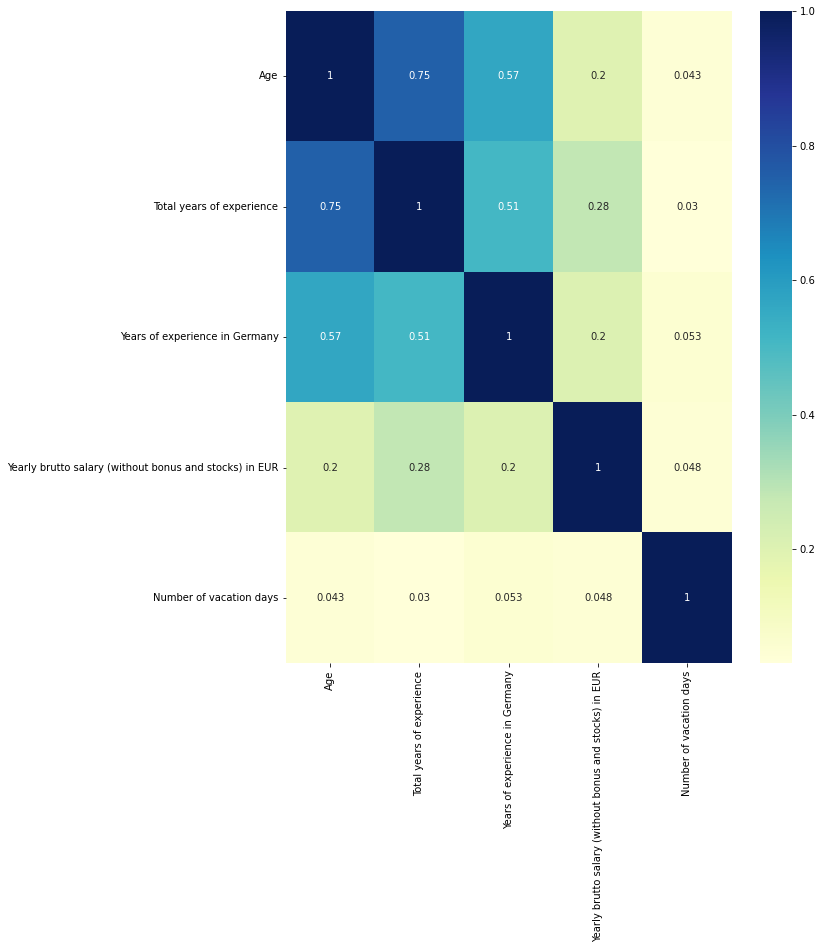

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 12))
data_plot = sns.heatmap(num_data.corr(), cmap="YlGnBu", annot=True)
plt.plot()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa88b02610>,
      dtype=object)

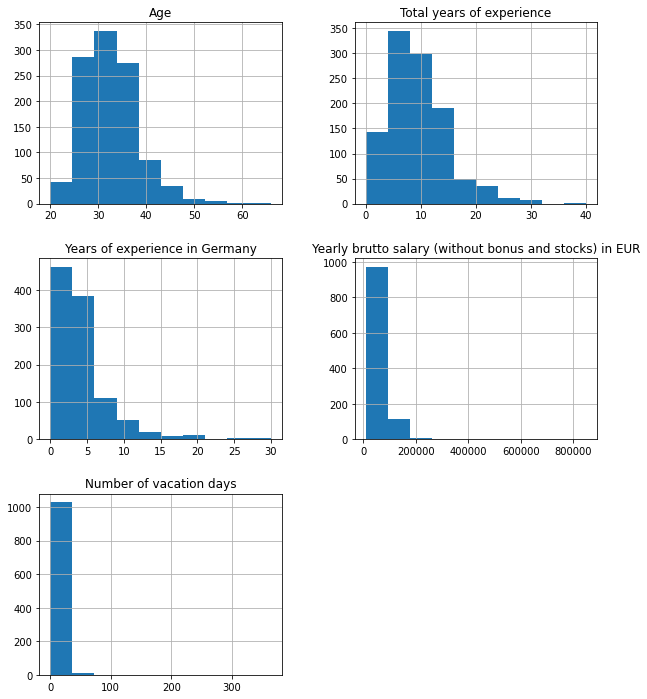

In [ ]:
num_data.hist(figsize=(10, 12))


In [ ]:
num_data.describe()


,Age,Total years of experience,Years of experience in Germany,Yearly brutto salary (without bonus and stocks) in EUR,Number of vacation days
count,1077.000000,1081.000000,1055.000000,1096.000000,1042.000000
mean,32.554318,8.931637,3.847583,72159.791177,28.329655
std,5.623410,5.363645,3.766547,33717.916391,11.144885
min,20.000000,0.000000,0.000000,10001.000000,0.000000
25%,29.000000,5.000000,1.000000,60000.000000,27.000000
50%,32.000000,8.000000,3.000000,70000.000000,28.000000
75%,36.000000,12.000000,5.000000,80000.000000,30.000000
max,66.000000,40.000000,30.000000,850000.000000,365.000000


In [ ]:
data


,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,30.0,Full-time employee,Unlimited contract,English,51-100,Product,No
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17.0,6.0,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,29.0,Full-time employee,Unlimited contract,English,101-1000,Product,No
5,24/11/2020 11:15:53,32.0,Male,Berlin,DevOps,5.0,1.0,Senior,"AWS, GCP, Python,K8s","Python, AWS, Google Cloud, Kubernetes, Docker",76000.0,30.0,Full-time employee,Unlimited contract,English,11-50,Startup,No
7,24/11/2020 11:16:44,24.0,Male,Berlin,Frontend Developer,5.0,1.0,Senior,Typescript,Javascript / Typescript,65000.0,27.0,Full-time employee,Unlimited contract,English,1000+,Product,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,18/01/2021 11:50:02,34.0,Male,Zurich,Software Engineer,7.0,2.0,Senior,PHP,PHP,108500.0,25.0,Full-time employee,Unlimited contract,English,11-50,Startup,No
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9.0,5.0,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,26.0,Full-time employee,Unlimited contract,English,51-100,Product,Yes
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15.0,2.0,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,28.0,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7.0,7.0,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350.0,27.0,Full-time employee,Unlimited contract,German,101-1000,Product,No


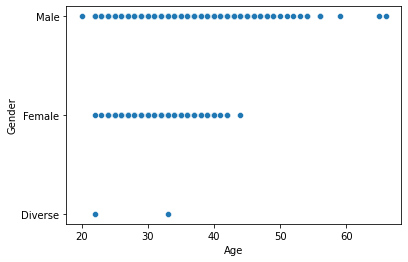

In [ ]:
sns.scatterplot(x=data['Age'], y=data['Gender'])
plt.show()
# Conclusion: females stop working after the age of 45


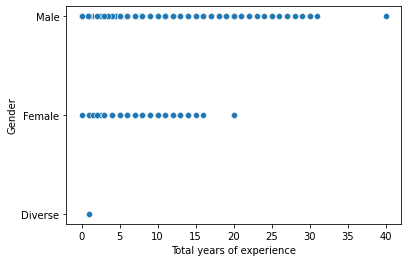

In [ ]:
sns.scatterplot(x=data['Total years of experience'], y=data['Gender'])
plt.show()
# Conclusion : women work for lesser years compared to men


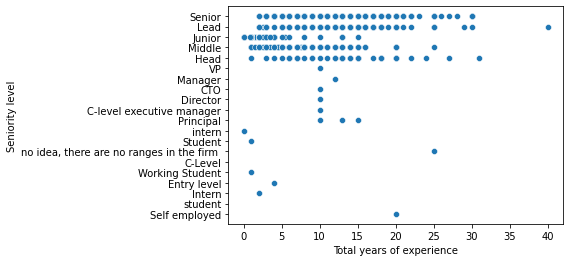

In [ ]:
sns.scatterplot(x=data['Total years of experience'], y=data['Seniority level'])
plt.show()
# Conclusion : Getting to bigger level needs experience


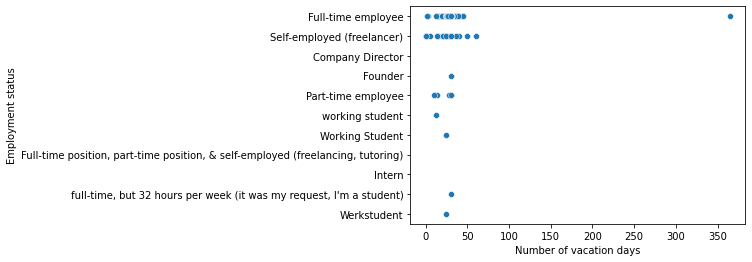

In [ ]:
sns.scatterplot(x=data['Number of vacation days'], y=data['Employment status'])
plt.show()


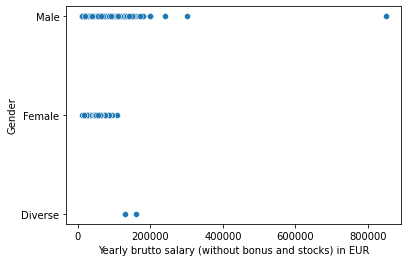

In [ ]:
sns.scatterplot(
    x=data['Yearly brutto salary (without bonus and stocks) in EUR'], y=data['Gender'])
plt.show()
# Conclusion : Females get less bonus


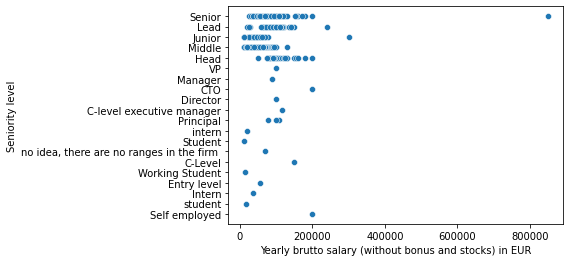

In [ ]:
sns.scatterplot(
    x=data['Yearly brutto salary (without bonus and stocks) in EUR'], y=data['Seniority level'])
plt.show()
# conlusion : getter levels gives more salary


In [ ]:
'''data.describe()'''


'data.describe()'

In [ ]:
'''data.info()'''


'data.info()'

In [ ]:
'''job_titles=data['Age']
print(job_titles.mean())'''


"job_titles=data['Age']\nprint(job_titles.mean())"

In [ ]:
'''
data=data.dropna(axis = 1, how ='all')
print(data)
gender=data['Gender']
male=data[data['Gender']=='Male']
female=data[data['Gender']=='Female']
diverse=data[data['Gender']=='Diverse']

#plt.plot(male['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'], female['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'])
#plt.show()


x_female=female['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'].values.tolist()
y_male=male['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'].values.tolist()

# fig, ax = plt.subplots()
# ax2 = ax.twinx()
print(x_female)
plt.plot(x_female)
plt.show()
# female.plot(x="Gender", y=["Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country"], ax=ax2, ls="--")
# fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

'''


'\ndata=data.dropna(axis = 1, how =\'all\')\nprint(data)\ngender=data[\'Gender\']\nmale=data[data[\'Gender\']==\'Male\']\nfemale=data[data[\'Gender\']==\'Female\']\ndiverse=data[data[\'Gender\']==\'Diverse\']\n\n#plt.plot(male[\'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country\'], female[\'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country\'])\n#plt.show()\n\n\nx_female=female[\'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country\'].values.tolist()\ny_male=male[\'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country\'].values.tolist()\n\n# fig, ax = plt.subplots()\n# ax2 = ax.twinx()\nprint(x_female)\nplt.plot(x_female)\nplt.show()\n# female.plot(x="Gender", y=["Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country"], ax=ax2,

Assignment Work


In [ ]:
import torch


In [ ]:
a = torch.tensor([5.], requires_grad=True)
b = torch.tensor([6.], requires_grad=True)

y = a**3-b**2
print(y)


tensor([89.], grad_fn=<SubBackward0>)


In [ ]:
y.backward()


In [ ]:
a.grad


tensor([75.])

In [ ]:
b.grad


tensor([-12.])

In [ ]:
# using for simple linear regression
W = torch.randn(1, 9, requires_grad=True)
b = torch.randn(1, requires_grad=True)
y = torch.randn(9, 1, requires_grad=True)

output = torch.matmul(W, y)+b
loss = 1-output
print(loss, output)


tensor([[0.2258]], grad_fn=<RsubBackward1>) tensor([[0.7742]], grad_fn=<AddBackward0>)


In [ ]:
loss.backward()


In [ ]:
W.grad


tensor([[ 0.1410, -0.3023, -0.9800,  0.9024,  0.4484, -0.8203,  0.3814, -0.3257,
          0.5068]])

Dataset creation


In [ ]:
from sklearn.datasets import make_classification


In [ ]:
class CustomDataset:
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        current_data = self.data[idx, :]
        current_target = self.targets[idx]

        return {
            "sample": torch.tensor(current_data, dtype=torch.float),
            "target": torch.tensor(current_target, dtype=torch.float)
        }


In [ ]:
X_train, Y_train = make_classification(1000)


In [ ]:
custom = CustomDataset(data=X_train, targets=Y_train)
custom[0]


{'sample': tensor([ 0.4274,  1.8236, -1.3274,  0.3847, -1.3640, -0.8118,  0.9889,  1.6755,
         -0.0499,  0.7429,  1.4990,  0.8331, -1.2121,  0.5154, -0.4976,  0.1892,
         -0.1042, -1.0459,  0.4248,  0.0659]), 'target': tensor(1.)}

In [ ]:
for idx in range(len(custom)):
    print(custom[idx])
    break


{'sample': tensor([ 0.4274,  1.8236, -1.3274,  0.3847, -1.3640, -0.8118,  0.9889,  1.6755,
        -0.0499,  0.7429,  1.4990,  0.8331, -1.2121,  0.5154, -0.4976,  0.1892,
        -0.1042, -1.0459,  0.4248,  0.0659]), 'target': tensor(1.)}


Data Loader


In [ ]:
train_loader = torch.utils.data.DataLoader(custom, batch_size=4, num_workers=2)


In [ ]:
for data in train_loader:
    print(data)
    break


{'sample': tensor([[ 0.4274,  1.8236, -1.3274,  0.3847, -1.3640, -0.8118,  0.9889,  1.6755,
         -0.0499,  0.7429,  1.4990,  0.8331, -1.2121,  0.5154, -0.4976,  0.1892,
         -0.1042, -1.0459,  0.4248,  0.0659],
        [ 1.0396,  0.0966, -1.1597, -0.6150, -0.0348, -0.5339, -0.7617,  1.2284,
         -1.1595,  1.0046,  0.5502,  0.2865, -0.2580, -0.4040, -0.2969, -1.4126,
          1.3758,  0.2485, -0.9978, -0.1357],
        [ 1.2141,  2.9655, -0.7323, -0.3371,  2.1676, -0.3428,  0.8757,  0.3677,
         -0.2634,  0.3505,  1.9749, -0.2167, -0.1886,  1.5516, -0.5063, -0.8413,
         -1.3229, -0.4302,  0.7527, -0.9578],
        [ 1.1196,  1.3908,  0.4431,  0.5844,  0.9777,  0.4726,  0.0352, -0.0455,
          0.6874,  0.2553, -0.3422, -0.2575,  1.3252, -1.0947, -1.0405, -1.8769,
         -1.5572,  0.1492, -1.3426, -0.1576]]), 'target': tensor([1., 0., 0., 0.])}
